webiste link - https://intel-karthiknp-sentimental-analysis.streamlit.app/

github link - https://github.com/palkar22/INTEL-UNNATI-PS-11-SUBMISSION

video link - https://youtu.be/BcgJSP8CrzQ?feature=shared

full dataset link - https://huggingface.co/datasets/palkar22/20000_data_points_intel
 
finetuning dataset link - https://huggingface.co/datasets/palkar22/intel_unnati    

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### COMBINING DATA FROM ALL E-COMMERCE SITES

In [2]:
import pandas as pd

In [3]:
import pandas as pd

# Load the Excel file
file_path = "Site wise reviews intel.xlsx"
xls = pd.ExcelFile(file_path)

# Read all sheet names
sheet_names = xls.sheet_names

# Initialize an empty DataFrame to hold the combined data
combined_df = pd.DataFrame()



In [4]:

# Loop through each sheet, rename columns, and append its data to the combined DataFrame
for sheet in sheet_names:
    sheet_df = pd.read_excel(file_path, sheet_name=sheet)

    # Append to the combined DataFrame
    combined_df = pd.concat([combined_df, sheet_df], ignore_index=True)

# Save the combined data to a new Excel file
combined_df.to_excel("Intel reviews 20000 records final.xlsx", index=False)

print("Combined data saved to Intel reviews 20000 records final.xlsx")


Combined data saved to Intel reviews 20000 records final.xlsx


### EDA


In [5]:
import pandas as pd

# Load the Excel file
file_path = "Intel reviews 20000 records final.xlsx"
df = pd.read_excel(file_path)

# Find the sum of NaN values in each column
nan_sum = df.isna().sum()

# Print the sum of NaN values for each column
print(nan_sum)


Reviewer Name               55
Stars                     2317
Short Review              8777
Review Date                  0
Review                      10
Reviewer Profile link    18439
Review link              18165
Product Name                 0
Helpful                  15533
Generation                  36
site                        78
name                         0
Stars                    19908
dtype: int64


In [6]:
# Display basic information about the DataFrame
print("Shape of the original DataFrame:", df.shape)

# Check if there are any NaN values in the 'Review' column before cleaning
nan_review_count_before = df['Review'].isna().sum()
print("\nNumber of NaN values in 'Review' column before deletion:", nan_review_count_before)


Shape of the original DataFrame: (20182, 13)

Number of NaN values in 'Review' column before deletion: 10


In [7]:

# Option 1: Forcefully convert empty strings to NaN
df['Review'] = df['Review'].replace('', pd.NA)

# Option 2: Drop NaN values in 'Review' column
df = df.dropna(subset=['Review'])


In [8]:

# Display information about the cleaned DataFrame
print("\nShape of the cleaned DataFrame:", df.shape)

# Check if there are any NaN values in the 'Review' column after cleaning
nan_review_count_after = df['Review'].isna().sum()
print("\nNumber of NaN values in 'Review' column after deletion:", nan_review_count_after)



Shape of the cleaned DataFrame: (20172, 13)

Number of NaN values in 'Review' column after deletion: 0


In [9]:
# Find the sum of NaN values in each column
nan_sum = df.isna().sum()

# Print the sum of NaN values for each column
print(nan_sum)

Reviewer Name               55
Stars                     2307
Short Review              8767
Review Date                  0
Review                       0
Reviewer Profile link    18429
Review link              18155
Product Name                 0
Helpful                  15523
Generation                  36
site                        78
name                         0
Stars                    19898
dtype: int64


### MODEL DATA BUILDING

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [11]:
# Load the Excel file
file_path = "Intel reviews 20000 records final.xlsx"
df = pd.read_excel(file_path)

# Display basic information about the DataFrame
print("Shape of the original DataFrame:", df.shape)


Shape of the original DataFrame: (20182, 13)


In [12]:
# Split the data into remaining and test sets
remaining_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [17]:
# Display information about the split DataFrames
print("Shape of the remaining set (remaining_df):", remaining_df.shape)
print("Shape of the testing set (test_df):", test_df.shape)

# Save remaining and test sets to Excel files
remaining_file_path = "remaining.xlsx"
test_file_path = "test.xlsx"

Shape of the remaining set (remaining_df): (16145, 13)
Shape of the testing set (test_df): (4037, 13)


In [18]:
remaining_df.to_excel(remaining_file_path, index=False)
test_df.to_excel(test_file_path, index=False)

print("\nremaining and test sets saved as remaining.xlsx and test.xlsx respectively.")


remaining and test sets saved as remaining.xlsx and test.xlsx respectively.


## FINETUNING TRAIN DATASET


NOT NECESSARY TO RUN HTE BELOW CELL AS THIS FILE IS SAVED IN HUGGING FACE AT palkar22/intel_unnati datasets.

However can be run to understand the distribution of reviews that is to be trained

In [50]:
import pandas as pd
from sklearn.utils import resample

# Load the Excel file
file_path = "/content/conclusions_updated.xlsx"
data = pd.read_excel(file_path)

# Drop the 'Actual_Sentiment' column if it exists
if 'Actual_Sentiment' in data.columns:
    data = data.drop(columns=['Actual_Sentiment'])

# Ensure all values in 'Predicted_Sentiment' are strings and replace NaN values with 'neutral'
data['Predicted_Sentiment'] = data['Predicted_Sentiment'].astype(str)
data['Predicted_Sentiment'] = data['Predicted_Sentiment'].fillna('neutral')

# Split the data into subsets
positive_data = data[data['Predicted_Sentiment'] == 'positive']
negative_data = data[data['Predicted_Sentiment'] == 'negative']
neutral_data = data[data['Predicted_Sentiment'] == 'neutral']

# Determine the target size for each class (33% of total data)
target_size = int(len(data) * 0.33)

# Resample the data
positive_data_resampled = resample(positive_data, replace=True, n_samples=target_size, random_state=42)
negative_data_resampled = resample(negative_data, replace=True, n_samples=target_size, random_state=42)
neutral_data_resampled = resample(neutral_data, replace=True, n_samples=target_size, random_state=42)

# Combine the resampled data
resampled_data = pd.concat([positive_data_resampled, negative_data_resampled, neutral_data_resampled])

# Save the resampled dataframe to a new Excel file
output_file_path = "123.xlsx"
resampled_data.to_excel(output_file_path, index=False)

# Display the distribution of 'Predicted_Sentiment' in the resampled data
distribution = resampled_data['Predicted_Sentiment'].value_counts(normalize=True)
distribution



Predicted_Sentiment
positive    0.333333
negative    0.333333
neutral     0.333333
Name: proportion, dtype: float64

### ABOVE OUTPUT SHOWS US THAT THERE ARE EQUAL NUMBER OF POSITIVE NEGATIVE AND NEUTRAL REVIEWS AND THEREFORE IT IS **NOT** A OVER OR UNDER FITTING MODEL

MODEL BUILDING

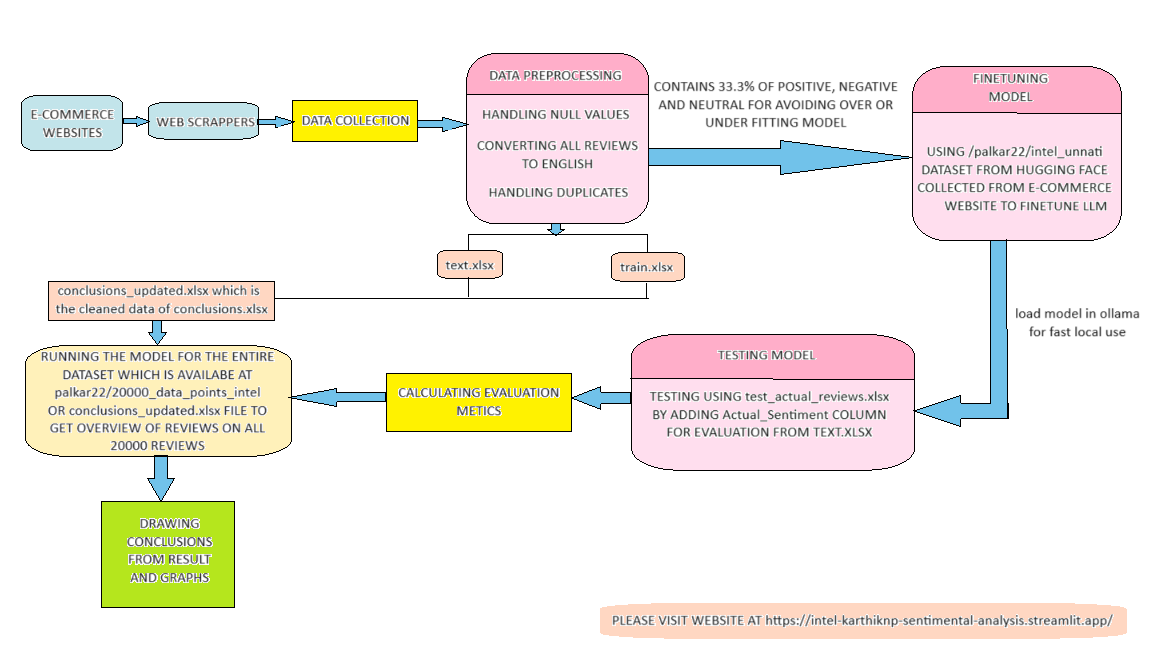

In [23]:
pip install langchain_community

In [24]:
pip install langchain

In [25]:
from langchain.llms import Ollama

In [ ]:
%%capture
%pip install accelerate peft bitsandbytes transformers trl

In [ ]:
import os
import torch
from datasets import load_dataset
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments,
    pipeline,
    logging,
)
from peft import LoraConfig
from trl import SFTTrainer

In [ ]:
# Model from Hugging Face hub
base_model = "NousResearch/Llama-2-7b-chat-hf"

# New instruction dataset
intel_dataset = "palkar22/intel_unnati"

# Fine-tuned model
new_model = "llama3"

In [ ]:
dataset = load_dataset(intel_dataset)

Generating train split:   0%|          | 0/19980 [00:00<?, ? examples/s]

In [ ]:
compute_dtype = getattr(torch, "float16")

quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=False,
)

In [ ]:
model = AutoModelForCausalLM.from_pretrained(
    base_model,
    quantization_config=quant_config,
    device_map={"": 0}
)
model.config.use_cache = False
model.config.pretraining_tp = 1

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(base_model, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

In [ ]:
peft_params = LoraConfig(
    lora_alpha=16,
    lora_dropout=0.1,
    r=64,
    bias="none",
    task_type="CAUSAL_LM",
)

In [ ]:
training_params = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,
    per_device_train_batch_size=4,
    gradient_accumulation_steps=1,
    optim="paged_adamw_32bit",
    save_steps=25,
    logging_steps=25,
    learning_rate=2e-4,
    weight_decay=0.001,
    fp16=False,
    bf16=False,
    max_grad_norm=0.3,
    max_steps=-1,
    warmup_ratio=0.03,
    group_by_length=True,
    lr_scheduler_type="constant",
    report_to="tensorboard"
)

In [ ]:
trainer = SFTTrainer(
    model=model,
    train_dataset=dataset,
    peft_config=peft_params,
    dataset_text_field="Predicted_Sentiment",
    max_seq_length=None,
    tokenizer=tokenizer,
    args=training_params,
    packing=False,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:100: FutureWarning: Deprecated argument(s) used in '__init__': dataset_text_field. Will not be supported from version '1.0.0'.

Deprecated positional argument(s) used in SFTTrainer, please use the SFTConfig to set these arguments instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:289: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:318: UserWarning: You passed a `dataset_text_field` argument to the SFTTrainer, the value you passed will override the one in the `SFTConfig`.
  warnings.warn(


Map:   0%|          | 0/19980 [00:00<?, ? examples/s]

In [ ]:
trainer.model.save_pretrained(new_model)
trainer.tokenizer.save_pretrained(new_model)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


('llama3/tokenizer_config.json',
 'llama3/special_tokens_map.json',
 'llama3/tokenizer.model',
 'llama3/added_tokens.json',
 'llama3/tokenizer.json')

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load the fine-tuned Llama3 model and tokenizer with memory-efficient settings
model_name_or_path = '/content/llama3'
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
model = AutoModelForCausalLM.from_pretrained(model_name_or_path, torch_dtype='auto', device_map='auto')

# Function to generate a response to a given question
def generate_response(question, max_length=50, num_return_sequences=1):
    # Tokenize the input question
    inputs = tokenizer.encode(question, return_tensors='pt')

    # Move inputs to the same device as the model
    inputs = inputs.to(model.device)

    # Generate the response using the model
    outputs = model.generate(
        inputs,
        max_length=max_length,
        num_return_sequences=num_return_sequences,
        do_sample=True,  # Enable sampling to allow for varied responses
        top_p=0.95,  # Use top-p (nucleus) sampling
        top_k=50,   # Use top-k sampling
        temperature=0.7,  # Control the randomness of the sampling
        pad_token_id=tokenizer.eos_token_id  # Ensure the end of the sequence is handled properly
    )

    # Decode and return the generated response
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Example usage
question = "What are the benefits of using Llama3 for natural language processing?"
response = generate_response(question)
print(response)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

What are the benefits of using Llama3 for natural language processing?

Llama3 is a library for natural language processing (NLP) that is designed to be fast, efficient, and easy to use. Here are some


In [ ]:
!pip install colab-xterm
%load_ext colabxterm
#save model in ollama Modelfile

In [ ]:
#type the commentted lines in terminal or in %xterm if you are using collab
#curl -fsSL https://ollama.com/install.sh | sh
#ollama serve & ollama pull llama3

In [ ]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [26]:
import pandas as pd
import re

class IntelSentimentModel:
    def __init__(self):
        # Define regular expressions for sentiment detection without word boundaries
        self.positive_pattern = re.compile(r'(positive|:positive|\\npositive)', re.IGNORECASE)
        self.negative_pattern = re.compile(r'(negative|:negative|\\nnegative)', re.IGNORECASE)
        self.neutral_pattern = re.compile(r'(neutral|:neutral|\\nneutral)', re.IGNORECASE)

    def classify_sentiment(self, text):
        text = text.lower()
        if self.positive_pattern.search(text):
            return 'positive'
        elif self.negative_pattern.search(text):
            return 'negative'
        elif self.neutral_pattern.search(text):
            return 'neutral'
        else:
            return 'neutral'  # Default to neutral if none of the patterns match

    def generate_and_classify_sentiment(self, review_text):
        ollama = Ollama(model = "llama3")
        output = ollama.invoke("Please analyze the following product review for an Intel core processor product and classify the sentiment as positive, negative, or neutral based on the user's perspective. Any review which has remarks about average performance or heat must be marked negative. Only use one of these words for the sentiment: positive, negative, neutral. If the sentiment is clearly negative, mark it as negative without being overly considerate.If review is empty string or nan put neutral. review: " + review_text)

        full_response = ""
        for item in output:
            full_response += item

        # Classify sentiment based on the accumulated output
        sentiment = self.classify_sentiment(full_response)

        return sentiment


TESTING

In [51]:
# Load test data
df_test = pd.read_excel('test.xlsx')

#using test_actual_reviews.xlsx which is the test.xlsx with an additional column "Actual_Sentiment"
#which is entered on the basis of stars and sentiment of reviews by user for best accurracy calculations

# Replace NaN values with empty string
df_test['Review'] = df_test['Review'].fillna("")

# Initialize IntelSentimentModel
intel_model = IntelSentimentModel()

# Predict sentiments for test data
df_test['Predicted_Sentiment'] = df_test['Review'].apply(intel_model.generate_and_classify_sentiment)

In [52]:
df_test.head(10)

,Reviewer Name,Stars,Short Review,Review Date,Review,Reviewer Profile link,Review link,Product Name,Helpful,Generation,site,name,Stars,Actual_Sentiment
0,DELAKOVA,4,[Rewarded Review] 400 watts plus,a month ago,Here is whay I think of the 14700K and its Sib...,NaN,NaN,Intel Core i7-14700K BX8071514700K,NaN,14,bestbuy.com,Intel Core i7 14700K,NaN,positive
1,cchi,NaN,NaN,"cchi - Friday, November 5, 2021 - link",https://hardwaresfera.com/en/noticias/hardware...,NaN,NaN,The Intel 12th Gen Core i9-12900K Review: Hybr...,NaN,12,Anand Tech,Intel Core i9 12900K,NaN,positive
2,GScott849,"(34 Ratings, 4.9 Average)",NaN,1 year 7 months ago,11th gen i5 goodness. Very good for general us...,https://pcpartpicker.com/user/GScott849/,"https://pcpartpicker.com/user/GScott849/, http...",Intel Core i5 11400 2.6 GHz 6 Core Processor,2 points,11,pcpartpicker,Intel Core i5 11400,NaN,positive
3,M.M. T.,4.0 out of 5 stars,alles bestens,Reviewed in Germany on 27 December 2023,it does what it's supposed to do....value for ...,NaN,NaN,"Intel Core i7 13700F Processor 30M Cache, up t...",NaN,13,amazon,Intel Core i7 13700F,NaN,positive
4,customer,5,NaN,2 years ago,Amazing happy,NaN,NaN,Intel Core i9-12900K,NaN,12,Reviewed on ebuyer.com,Intel Core i9 12900K,NaN,positive
5,Franklin,5,[Rewarded Review] I9 13900k,a year ago,Running HOT. Not problem with a good AIO. Love...,NaN,NaN,intel core i9 13th 13900,NaN,13,bestbuy.com,Intel Core i9 13900,NaN,positive
6,Intel i5-12400F 4.4 GHz Upto 4.4 GHz LGA1700 S...,NaN,Great product,May/2023 Vijayawada,Nice,NaN,https://www.flipkart.com/reviews/PSRGCVGB9FH9H...,Intel Core I5 12400F 12 Gen Generation Desktop...,0,12,Flipkart,Intel Core I5 12400F,5.0,positive
7,BERDUGO C. J. A.,5,NaN,2 months ago,Very good performance.,NaN,NaN,Intel Core i7-14700K BX8071514700K,NaN,14,coolmod.com,Intel Core i7 14700K,NaN,positive
8,allegro.pl Shopper,5,NaN,2 years ago,"ok, I recommend it",NaN,NaN,Intel Core i7-12700,NaN,12,allegro.pl,Intel Core i7 12700,NaN,positive
9,Matei,5,NaN,a year ago,"A MIRACLE OF TECHNOLOGY, BUT... You don't beli...",NaN,NaN,Intel Core i7 13700,NaN,13,cel.ro/,Intel Core i7 13700,NaN,positive


RUNNING MODEL ON remaining.xlsx SO THAT BOTH TEST AND REMAINING CAN BE COUPLED TO GIVE conclusions.xlsx TO MAKE ANALYSIS ON ENTIRE DATASET FROM THE MODEL MODEL WHICH IS FINETUNED FROM MODEL HAVING 33.33% OF POSITIVE NEGATIVE NEUTRAL REVIEWS EACH

In [53]:
intel = IntelSentimentModel()

# Load data
df = pd.read_excel('remaining.xlsx')

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# Apply the function to each review in the dataframe
df['Predicted_Sentiment'] = df['Review'].apply(intel.generate_and_classify_sentiment)

# Save the updated dataframe with predicted sentiment
df.to_excel('remaining.xlsx', index=False)

In [ ]:
# Display or further process the dataframe as needed
print(df.head(10))

                     Reviewer Name                      Stars  \
0                        GaurSahab         1.0 out of 5 stars   
1                 Therealderpaherp  (58 Ratings, 4.9 Average)   
2  Google Customer Reviews Shopper                          5   
3                         APDuenas     Rated 5 out of 5 stars   
4              yahoo.co.jp Shopper                          3   
5  Google Customer Reviews Shopper                          5   
6                            Maria         5.0 out of 5 stars   
7                            Keith         5.0 out of 5 stars   
8                            Piotr                          5   
9      Michael Justin Allen Sexton                        4.5   

                                        Short Review  \
0                           I received used product.   
1                                                NaN   
2                                                NaN   
3    A Real Powerhouse of a CPU for a High End Build   
4   

ACCURACY

In [29]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df_test = pd.read_excel("test_actual_reviews.xlsx")


In [30]:
from sklearn.metrics import accuracy_score

In [31]:
# Calculate accuracy
accuracy = accuracy_score(df_test['Actual_Sentiment'], df_test['Predicted_Sentiment'])

# Calculate precision, recall, and F1 score
precision = precision_score(df_test['Actual_Sentiment'], df_test['Predicted_Sentiment'], average='weighted')
recall = recall_score(df_test['Actual_Sentiment'], df_test['Predicted_Sentiment'], average='weighted')
f1 = f1_score(df_test['Actual_Sentiment'], df_test['Predicted_Sentiment'], average='weighted')


In [32]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9183
Precision: 0.9312
Recall: 0.9183
F1 Score: 0.9226


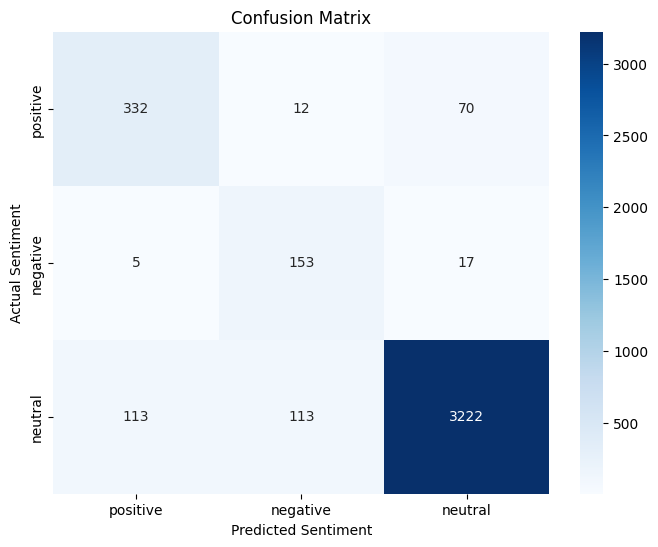

In [33]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(df_test['Actual_Sentiment'], df_test['Predicted_Sentiment'])

# Plot confusion matrix
labels = df_test['Actual_Sentiment'].unique()
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()





### CONCLUSIONS

In [34]:
import pandas as pd

# Load data from remaining.xlsx and test.xlsx
remaining_df = pd.read_excel('remaining.xlsx')
test_df = pd.read_excel('test_actual_reviews.xlsx')

# Combine remaining and test dataframes
combined_df = pd.concat([remaining_df, test_df], ignore_index=True)

# Save combined dataframe to conclusions.xlsx
combined_df.to_excel('conclusions.xlsx', index=False)

print("Combined data saved to conclusions.xlsx")


Combined data saved to conclusions.xlsx


Using conclusions_updated file from model folder of github link which is the cleaned data of above obtained conclusions.xlsx in ExcelFile

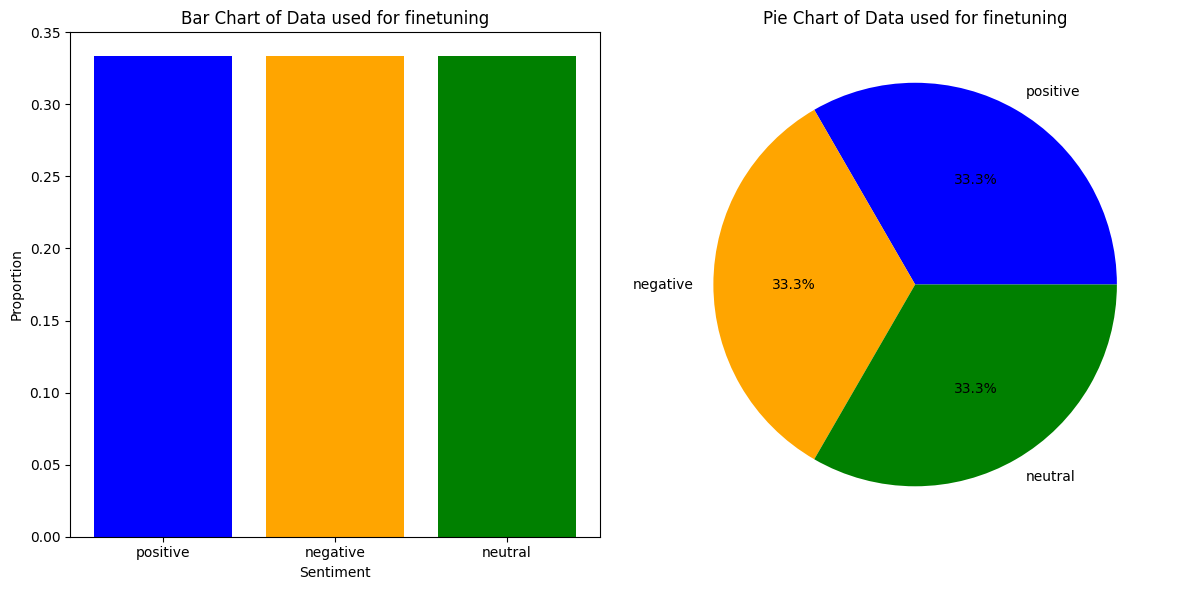

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming resampled_data is already defined
# For demonstration, I'll create a sample resampled_data
data = {'Predicted_Sentiment': ['positive', 'negative', 'neutral']}
resampled_data = pd.DataFrame(data)

# Calculate the distribution
distribution = resampled_data['Predicted_Sentiment'].value_counts(normalize=True)

# Plotting the distribution
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
axs[0].bar(distribution.index, distribution.values, color=['blue', 'orange', 'green'])
axs[0].set_title('Bar Chart of Data used for finetuning')
axs[0].set_xlabel('Sentiment')
axs[0].set_ylabel('Proportion')

# Pie chart
axs[1].pie(distribution.values, labels=distribution.index, autopct='%1.1f%%', colors=['blue', 'orange', 'green'])
axs[1].set_title('Pie Chart of Data used for finetuning')

# Display the plot
plt.tight_layout()

plt.show()


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("conclusions_updated.xlsx")

In [44]:
df.shape

(20182, 15)

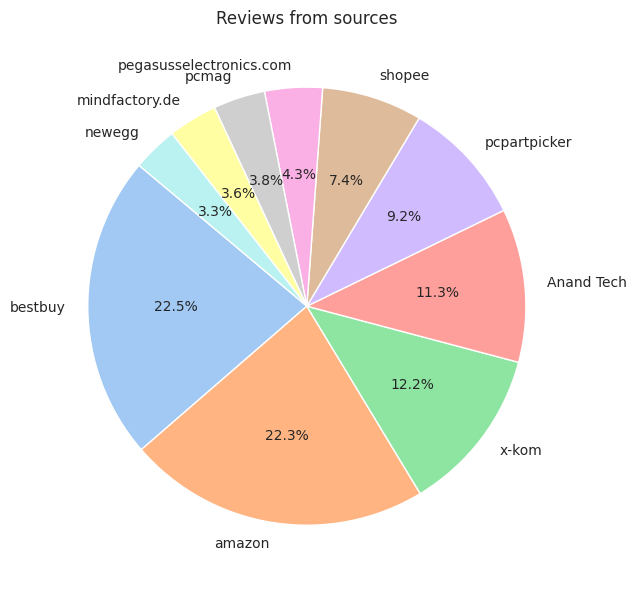

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate sentiment summary by name and site
sentiment_summary = df.groupby(['name', 'site']).size().unstack(fill_value=0)

# Filter sources with significant number of reviews
significant_sources = sentiment_summary.sum(axis=0).sort_values(ascending=False).index[:10]
sentiment_summary = sentiment_summary[significant_sources]

# Plot settings
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Pie Chart
plt.subplot(1, 1, 1)
overall_sentiment = sentiment_summary.sum()
plt.pie(overall_sentiment, labels=overall_sentiment.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Reviews from sources')

plt.tight_layout()
plt.show()


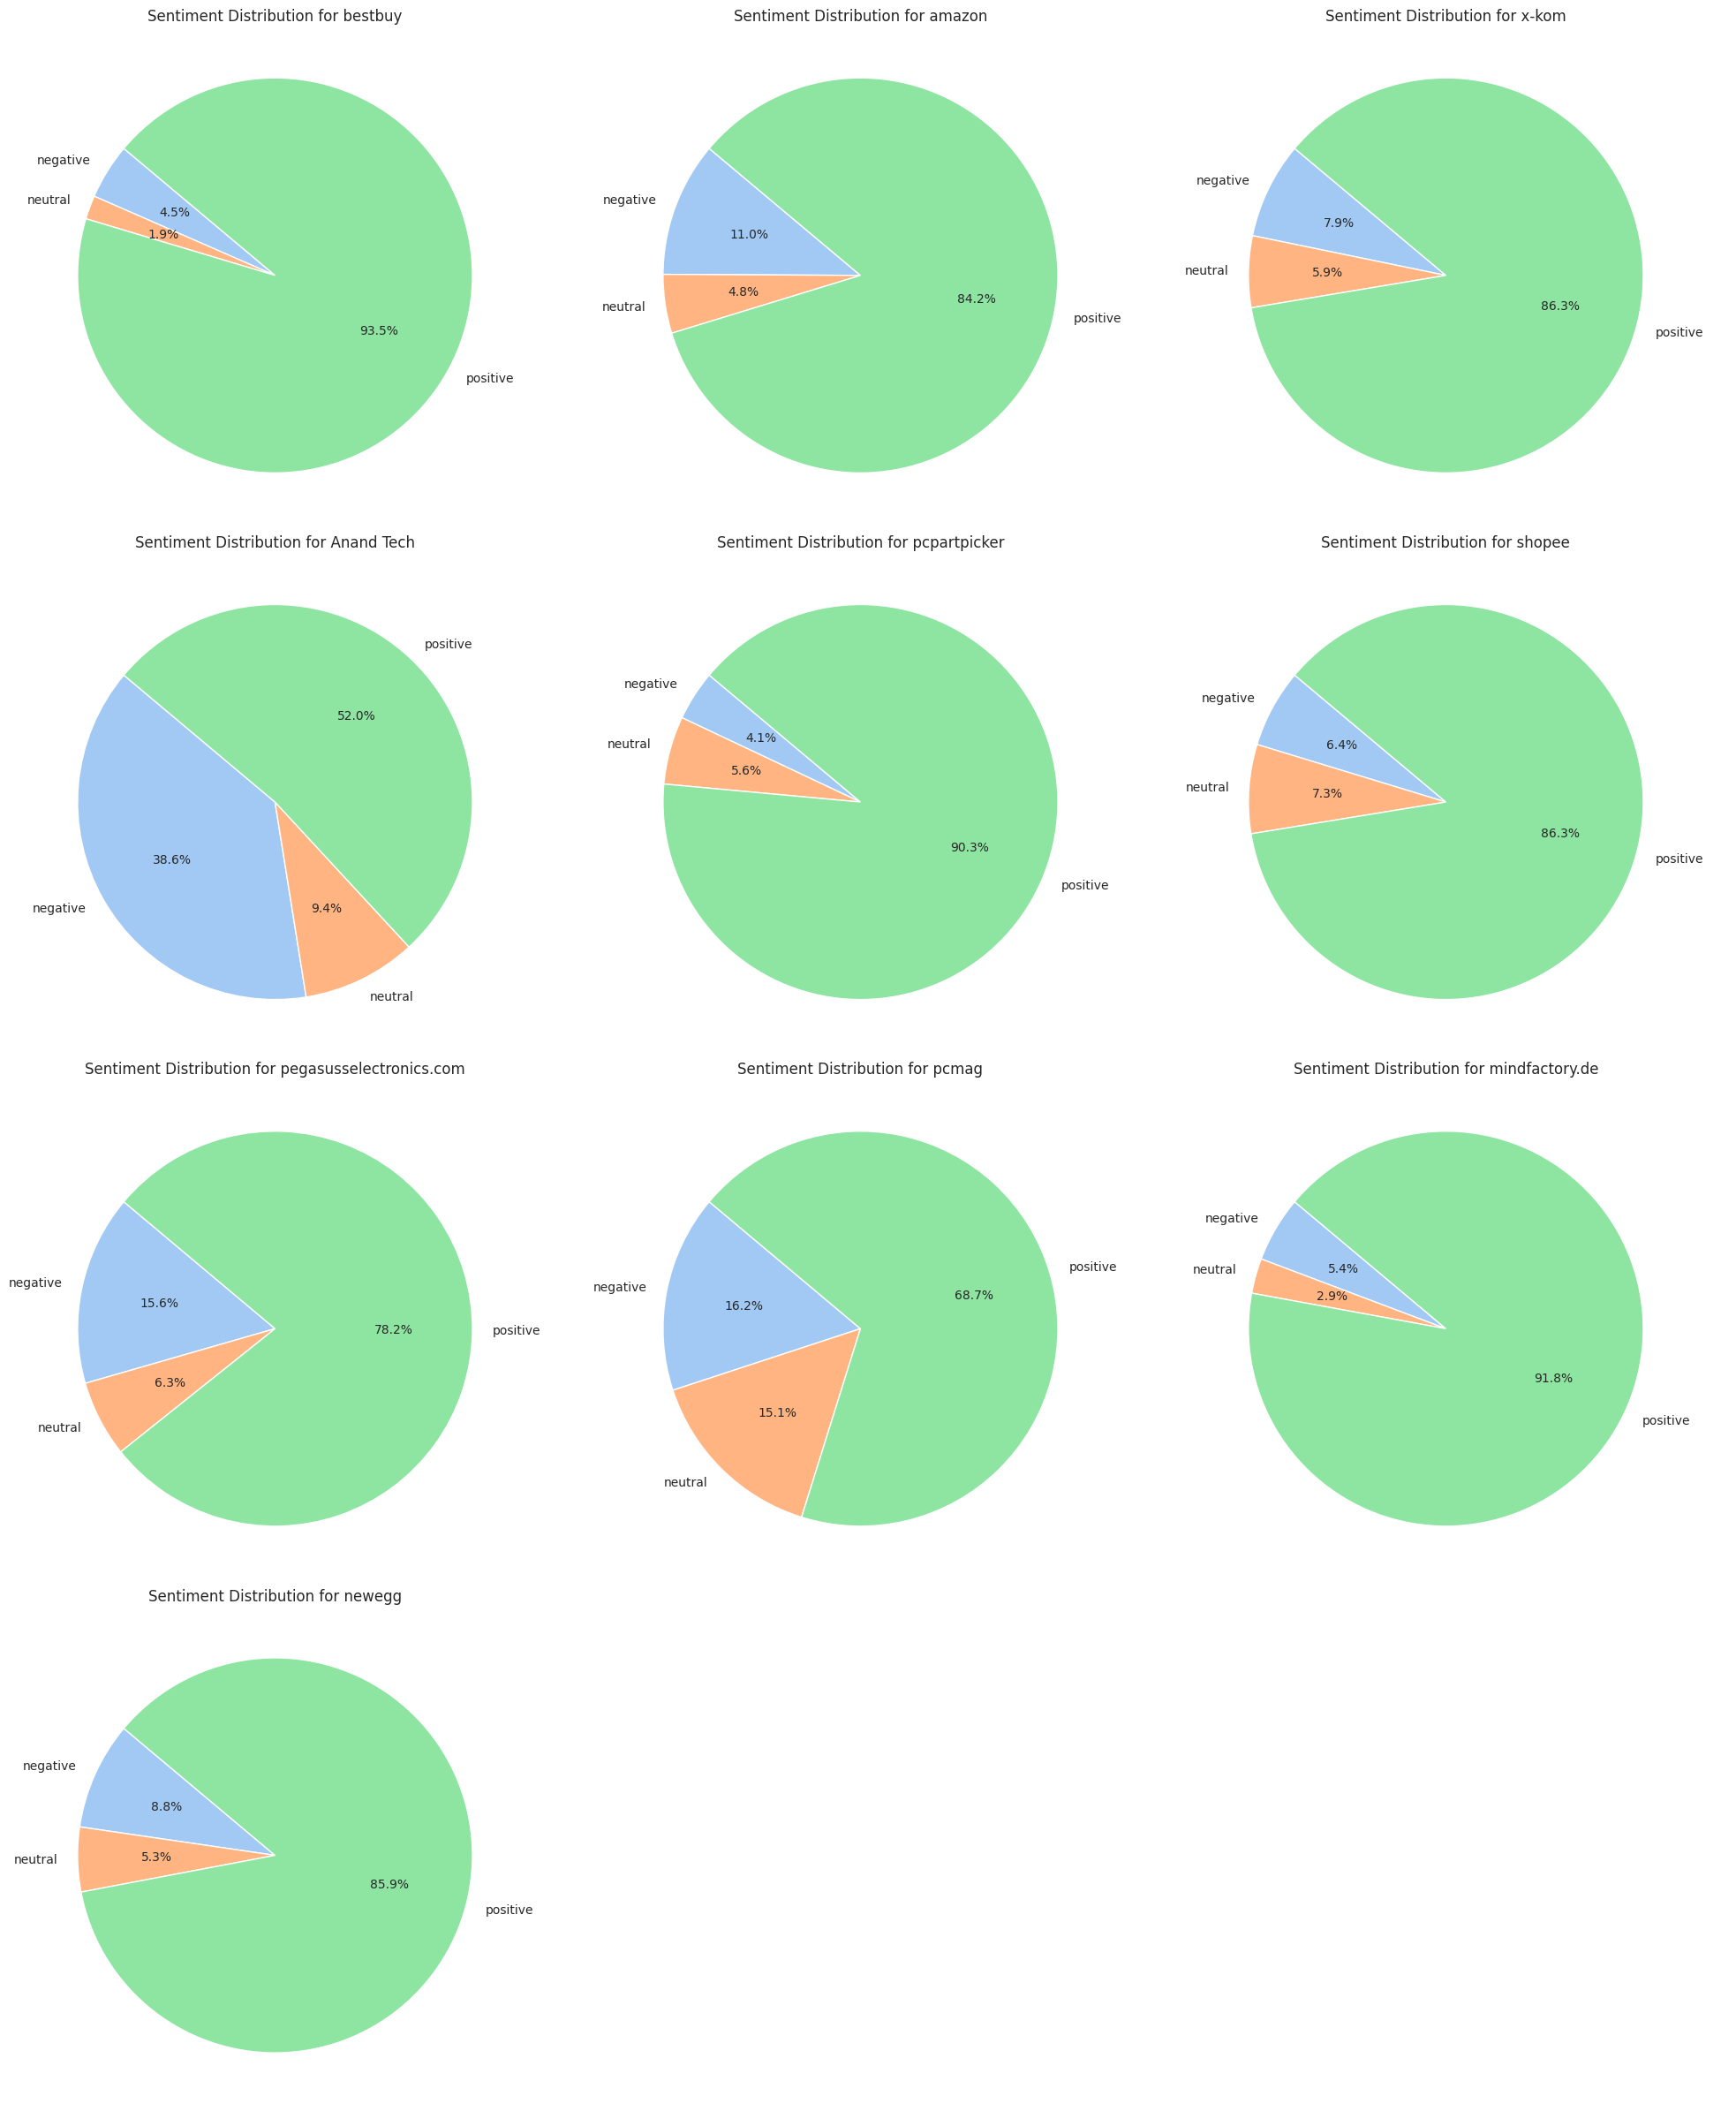

In [46]:
# Calculate sentiment summary by site and predicted sentiment
sentiment_summary = df.groupby(['site', 'Predicted_Sentiment']).size().unstack(fill_value=0)

# Filter top 10 significant sources
significant_sources = sentiment_summary.sum(axis=1).sort_values(ascending=False).index[:10]
sentiment_summary = sentiment_summary.loc[significant_sources]

# Plot settings
sns.set_style('whitegrid')

# Define the number of subplots
num_sites = len(significant_sources)
cols = 3
rows = (num_sites // cols) + (num_sites % cols > 0)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6))
axes = axes.flatten()

# Generate pie charts for each site
for ax, site in zip(axes, sentiment_summary.index):
    sentiment_counts = sentiment_summary.loc[site]
    ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    ax.set_title(f'Sentiment Distribution for {site}')

# Hide any empty subplots
for i in range(num_sites, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


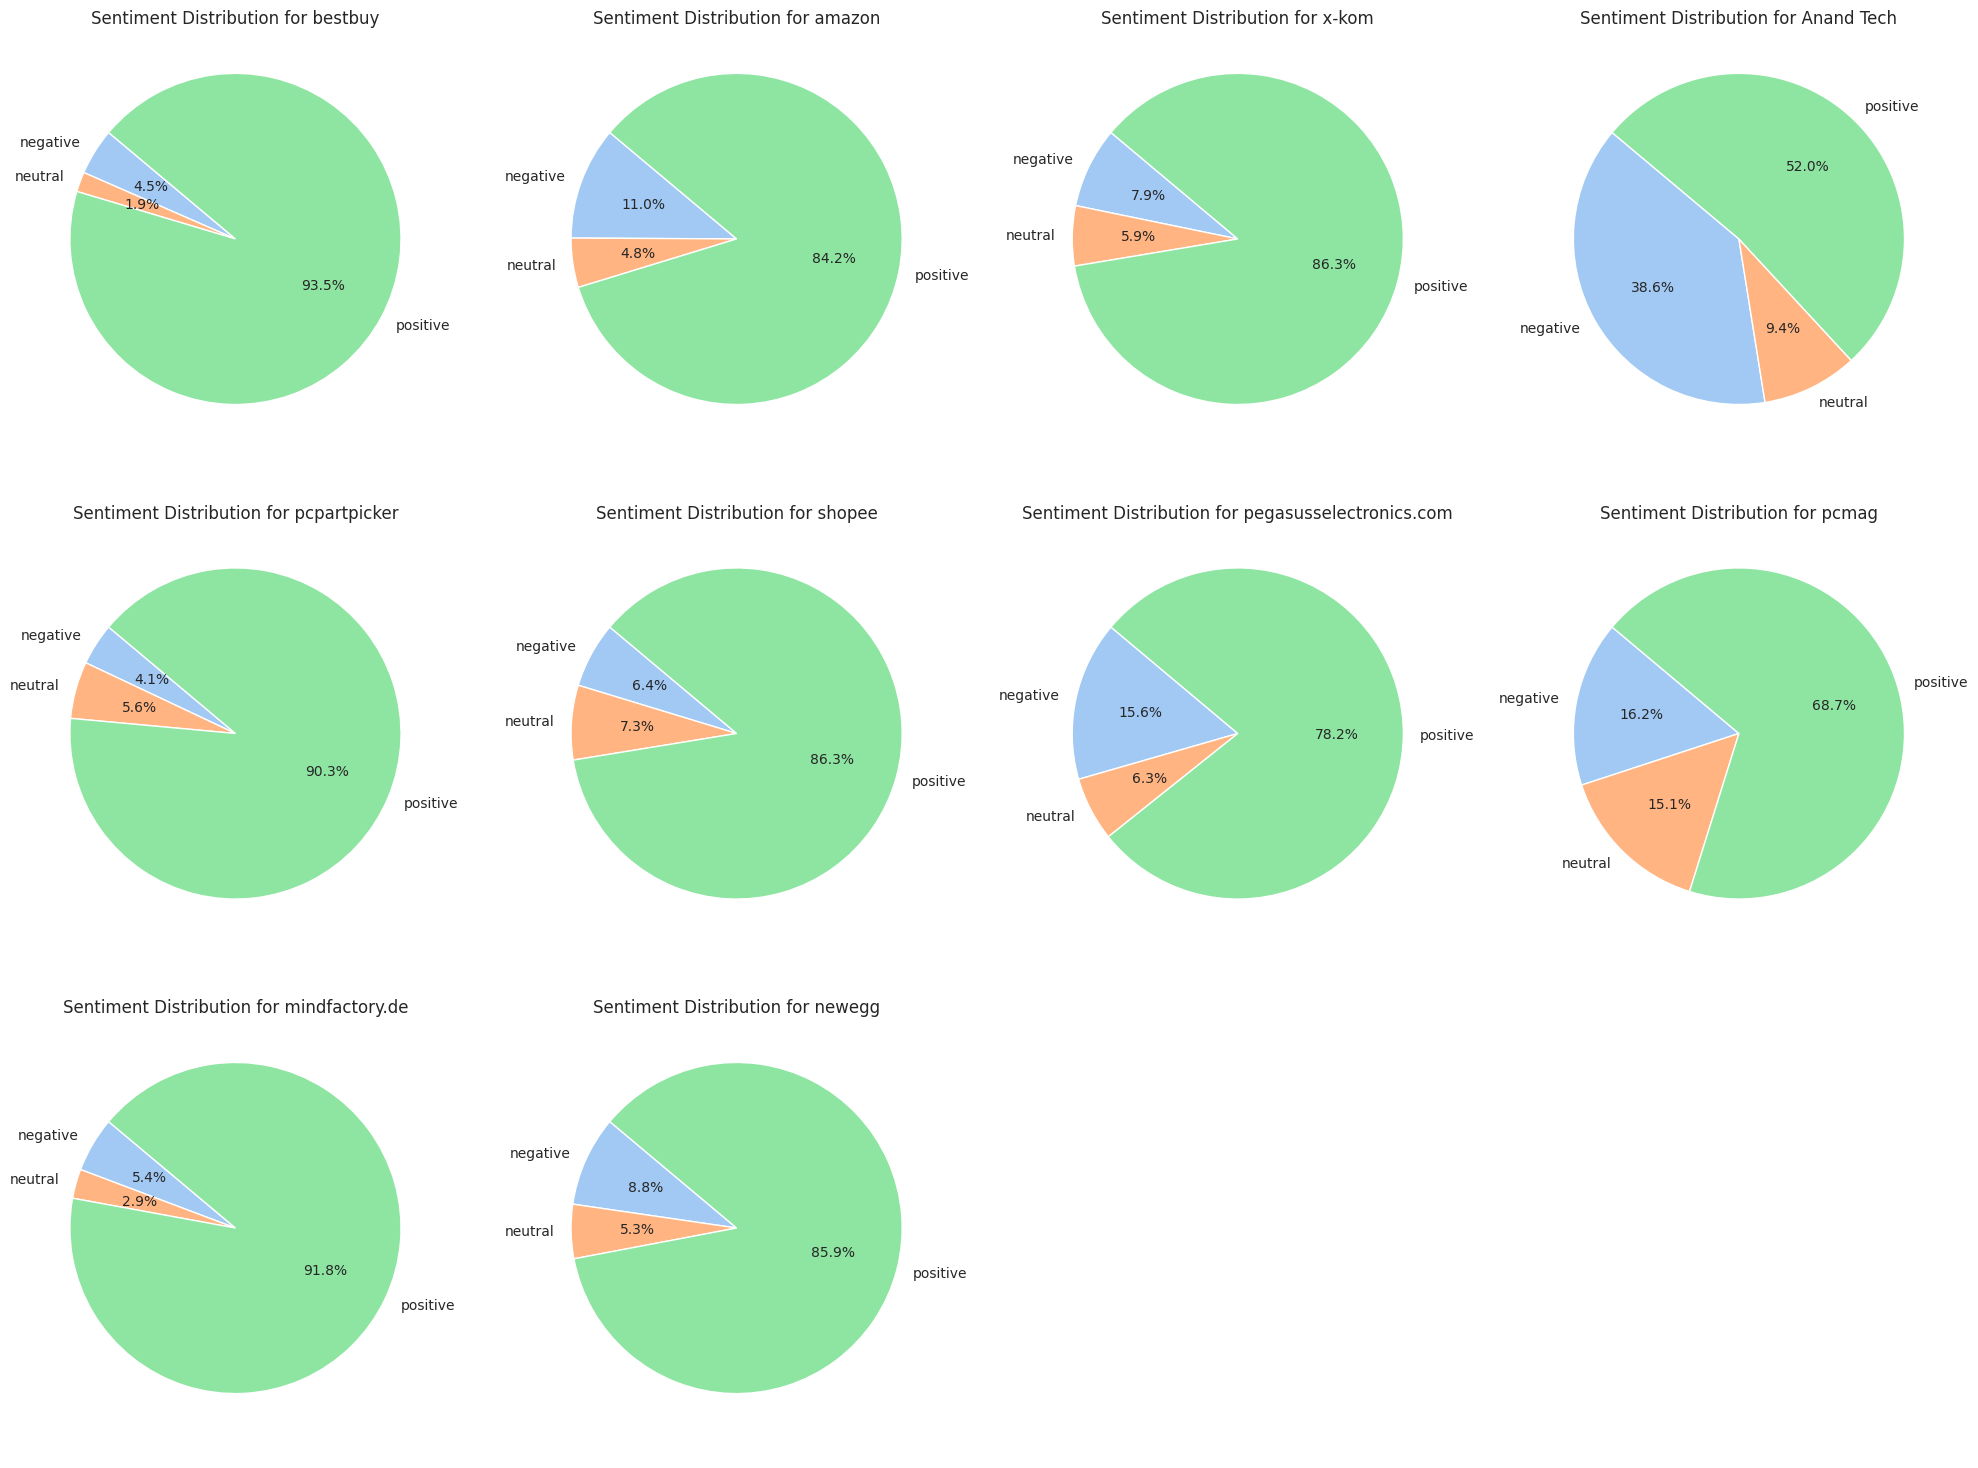

In [47]:
# Plot settings
sns.set_style('whitegrid')

# Define the number of subplots
num_names = len(sentiment_summary)
cols = 4
rows = (num_names // cols) + (num_names % cols > 0)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten()

# Generate pie charts for each name
for ax, name in zip(axes, sentiment_summary.index):
    sentiment_counts = sentiment_summary.loc[name]
    ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    ax.set_title(f'Sentiment Distribution for {name}')

# Hide any empty subplots
for i in range(num_names, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

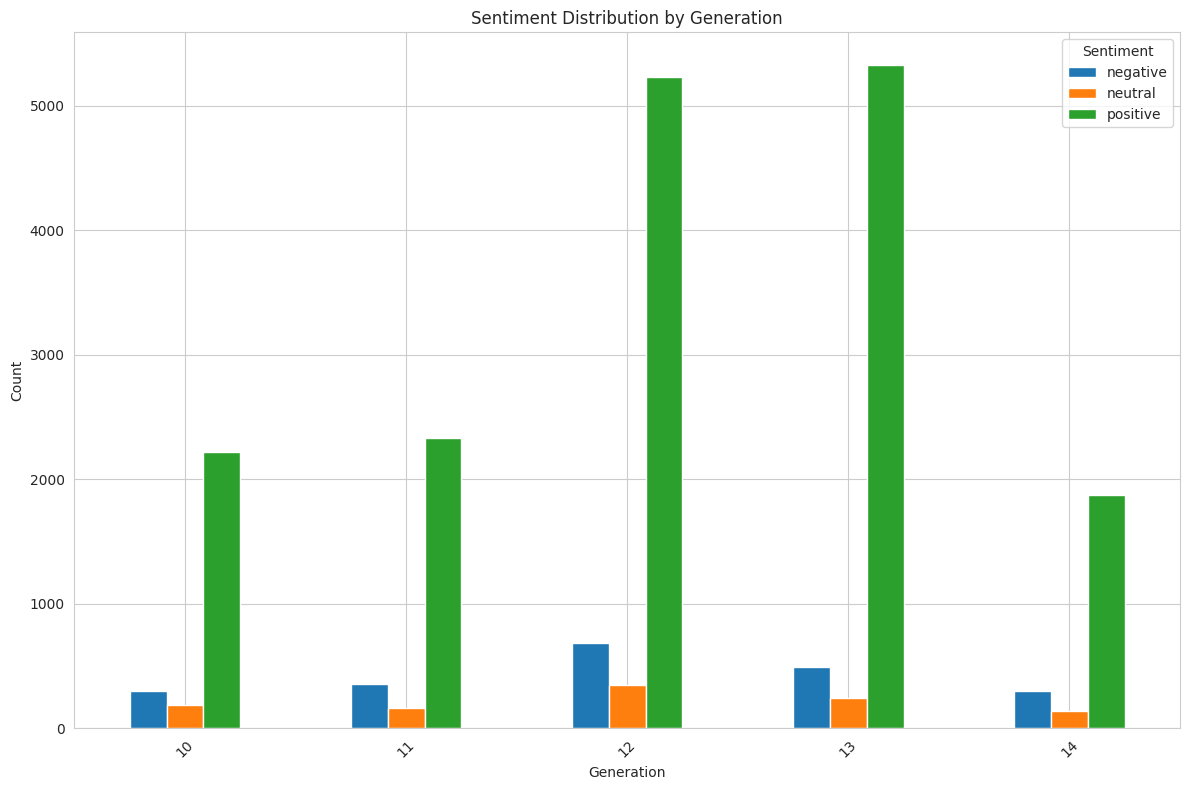

In [48]:
# Group by 'Generation' and count the sentiment categories
generation_sentiment_summary = df.groupby(['Generation', 'Predicted_Sentiment']).size().unstack(fill_value=0)

# Plot settings
sns.set_style('whitegrid')

# Create bar plots for each generation
generation_sentiment_summary.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Sentiment Distribution by Generation')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

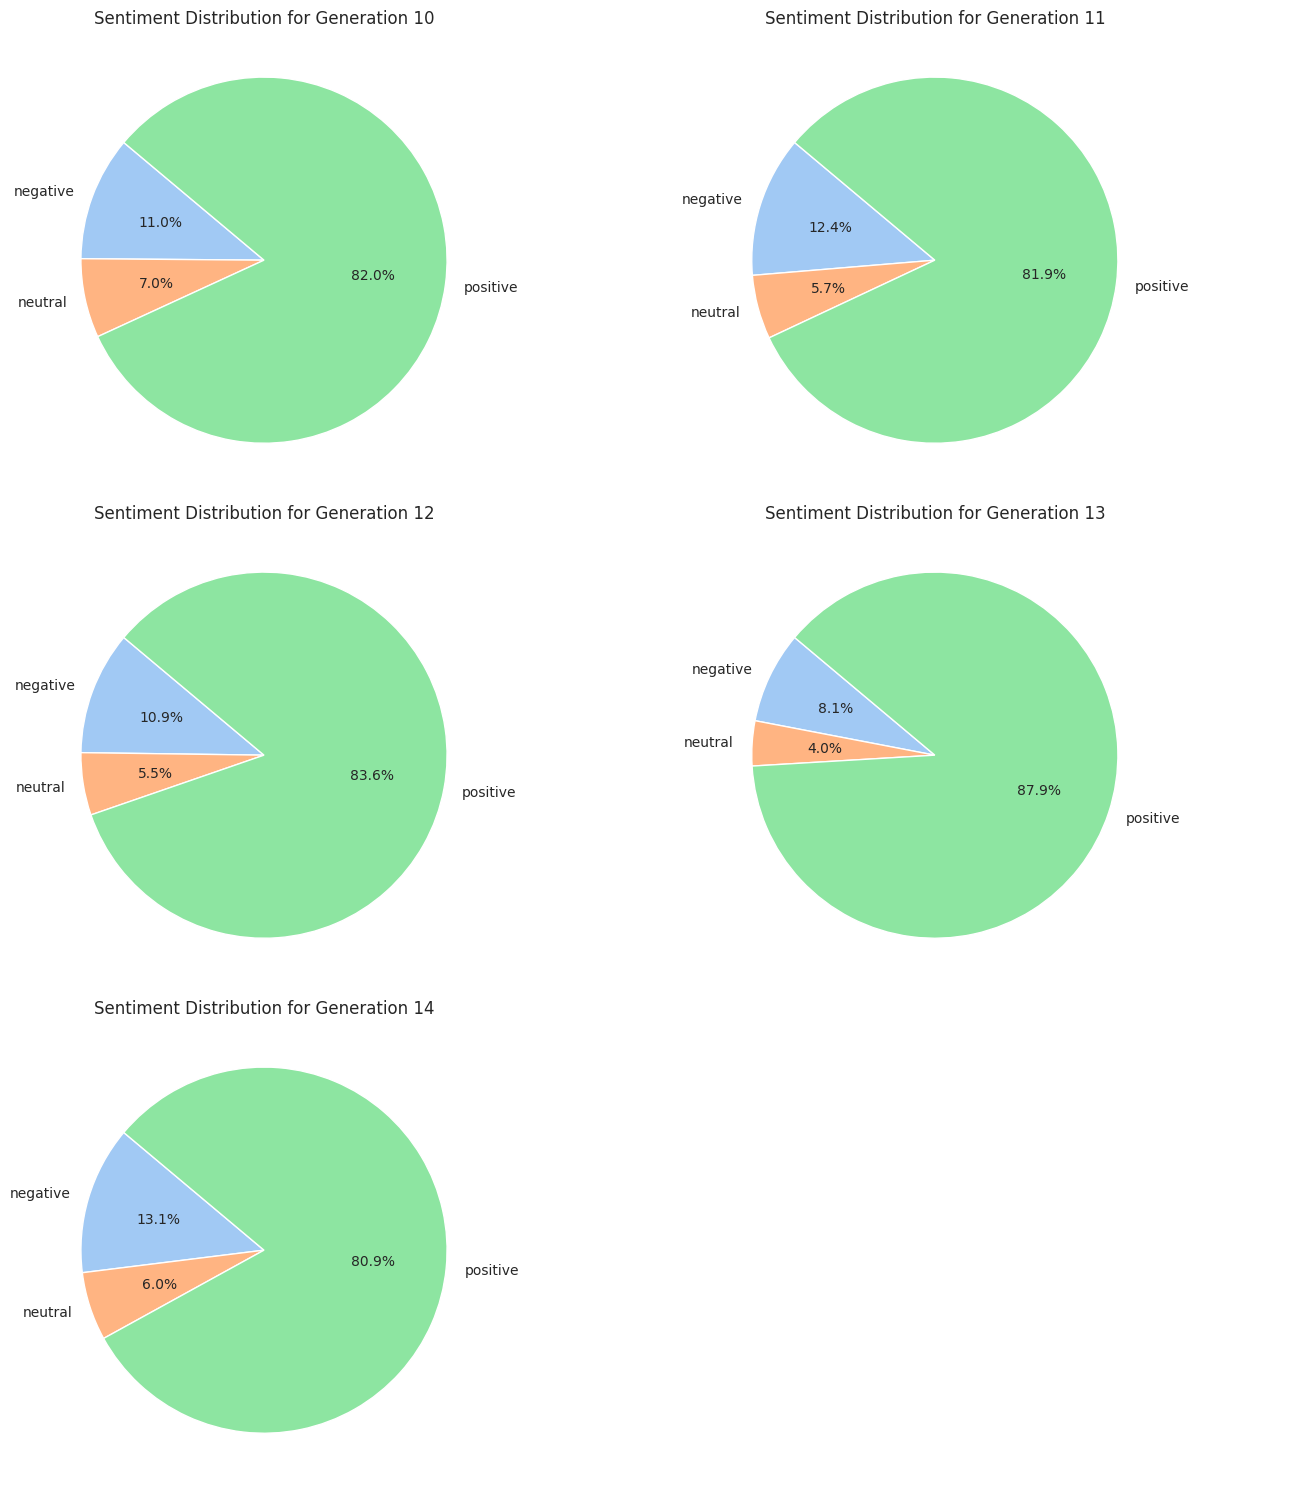

In [49]:
# Plot settings
sns.set_style('whitegrid')

# Define the number of subplots
num_generations = len(generation_sentiment_summary)
cols = 2
rows = (num_generations // cols) + (num_generations % cols > 0)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 5))
axes = axes.flatten()

# Generate pie charts for each generation
for ax, generation in zip(axes, generation_sentiment_summary.index):
    sentiment_counts = generation_sentiment_summary.loc[generation]
    ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    ax.set_title(f'Sentiment Distribution for Generation {generation}')

# Hide any empty subplots
for i in range(num_generations, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()